In [74]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Introducción y objetivos

En este análisis exploratorio de datos (EDA), el objetivo es realizar un diagnóstico detallado del comportamiento del sector de telecomunicaciones en Argentina, 
con especial enfoque en los servicios de internet. El análisis está basado en datos proporcionados por el ENACOM (Ente Nacional de Comunicaciones) de Argentina.

Este estudio se articula en torno a tres objetivos fundamentales:

1. Orientar a la empresa en brindar una buena calidad de servicio. 
2. Identificar oportunidades de crecimiento.
3. Plantear soluciones personalizadas para los clientes.

Propósito del EDA
El propósito del EDA es explorar y comprender las variables cualitativas y cuantitativas de los dataset para identificar patrones que permitan lograr estos tres objetivos.

# 2. Análisis cualitativo  - Top 5 provincias ordenadas por población

## Justificación del gráfico:
Se selecciona este gráfico porque interesa conocer cuales son las provincias con mayor población, por lo siguiente:
- Se requiere identificar donde existe la mayor población que pueda cubrir las inversiones que realice la empresa de telecomunicaciones.
- Se busca la mayor cantidad de población para tener mayores clientes potenciales. 

In [4]:
# Detalles de la conexión a la base de datos PostgreSQL
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
ENDPOINT = 'localhost'  # El nombre del host
USER = 'pi2_user'  # Usuario de la base de datos
PASSWORD = '1234'  # Contraseña del usuario
PORT = 5432  # Puerto de PostgreSQL (por defecto es 5432)
DATABASE = 'pi2'  # El nombre de la base de datos

# Crear la URL de conexión a la base de datos
connection_string = f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASE}"

# Crear el motor de conexión
engine = create_engine(connection_string)

In [20]:
# Cargar los DataFrames desde la base de datos
df_top5 = pd.read_sql('SELECT * FROM top5_provincia', con=engine)

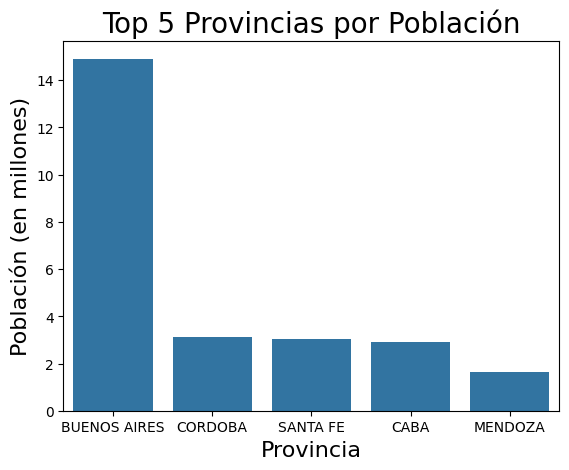

In [23]:
# Evitar el SettingWithCopyWarning usando .loc
df_top5 = df_top5.copy()  # Hacer una copia explícita del DataFrame para evitar la advertencia
df_top5['porcentaje'] = (df_top5['poblacion'] / df_top5['poblacion'].sum()) * 100

# Aumentar el tamaño de la figura para dar más espacio
#plt.figure(figsize=(20, 8))  # Aumentar el tamaño de la figura aún más

# Crear el gráfico de barras
sns.barplot(data=df_top5, x='provincia', y='poblacion')

# Personalizar el gráfico
plt.title('Top 5 Provincias por Población', fontsize=20)
plt.xlabel('Provincia', fontsize=16)
plt.ylabel('Población (en millones)', fontsize=16)

# Ajustar los valores en el eje Y a millones para mejor comprensión
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 1e6))))

# Eliminar el ajuste automático de márgenes
plt.show()

## Conclusiones del gráfico. 
El gráfico nos identifica las 5 provincias con mayor población, por lo tanto, vamos a enfocar nuestro análisis en estas 5 provincias, las cuales son:
- Buenos Aires
- Cordoba
- Santafe
- Caba
- Mendoza

Se observa que la provincia de Buenos Aires tiene una población muy superior a las otras 4 provincias, por lo cual para el resto de análisis quizás debamos separar los datos de esta provincia de las demás.

# 3. Análisis combinado entre cualitativo [años (ordinal) y tipo de tecnologia (nominal)] y cuantitativo [accesos a internet]

## Justificación del gráfico.
Se utiliza este gráfico porque nos permite: 
1. Identificar la tendencia de crecimiento de los accesos a internet. 
2. Identificar visualmente las tecnologías que más estan creciendo a través de los años.

Vamos a generar dos gráficos para separar los datos de 'Buenos Aires' de las demás provincias, ya que al tener una mayor cantidad de población, es posible que nos distorsione la realidad de las otras provincias. 

In [26]:
df_accesoTecnologiaProvincia = pd.read_sql('SELECT * FROM accesotecnologiaprovincia', con=engine)

<Figure size 1200x800 with 0 Axes>

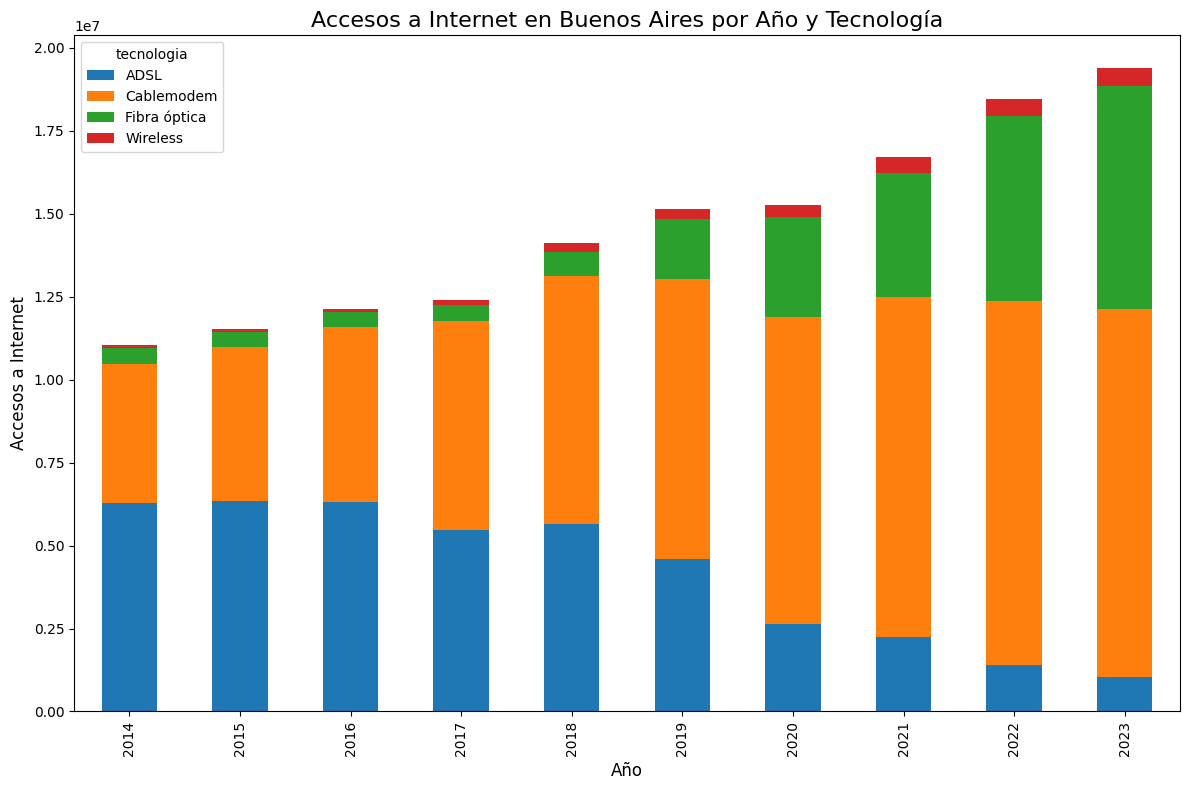

<Figure size 1200x800 with 0 Axes>

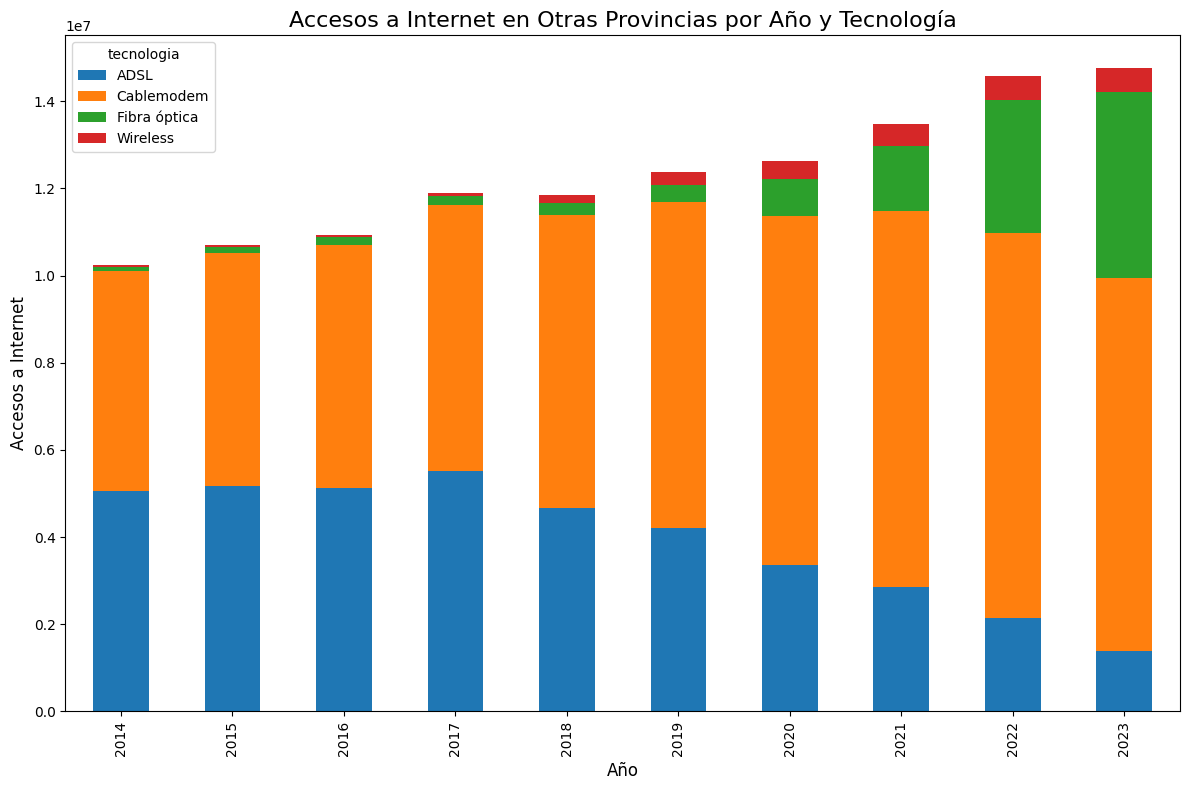

In [34]:
# Obtener el dataframe de la base de datos
df_accesoTecnologiaProvincia = pd.read_sql('SELECT * FROM accesotecnologiaprovincia', con=engine)

# Asegurarse de que la columna 'Fecha' esté en formato datetime
df_accesoTecnologiaProvincia['Fecha'] = pd.to_datetime(df_accesoTecnologiaProvincia['fecha'], errors='coerce')

# Crear una nueva columna 'Año' a partir de la columna 'Fecha'
df_accesoTecnologiaProvincia['Año'] = df_accesoTecnologiaProvincia['Fecha'].dt.year

# Filtrar para Buenos Aires
df_buenos_aires = df_accesoTecnologiaProvincia[df_accesoTecnologiaProvincia['provincia'] == 'Buenos Aires']

# Filtrar para las otras 4 provincias
otras_provincias = ['Córdoba', 'Santa Fe', 'Capital Federal', 'Mendoza']
df_otras_provincias = df_accesoTecnologiaProvincia[df_accesoTecnologiaProvincia['provincia'].isin(otras_provincias)]

# Gráfico para Buenos Aires
plt.figure(figsize=(12, 8))
df_buenos_aires_agrupado = df_buenos_aires.groupby(['Año', 'tecnologia'])['accesos'].sum().unstack()
df_buenos_aires_agrupado.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Accesos a Internet en Buenos Aires por Año y Tecnología', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos a Internet', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico para las otras 4 provincias
plt.figure(figsize=(12, 8))
df_otras_provincias_agrupado = df_otras_provincias.groupby(['Año', 'tecnologia'])['accesos'].sum().unstack()
df_otras_provincias_agrupado.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Accesos a Internet en Otras Provincias por Año y Tecnología', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos a Internet', fontsize=12)
plt.tight_layout()
plt.show()


## Conclusiones del gráfico. 

1. Los gráficos nos muestran una tendencia de crecimiento en los accesos a internet.
2. Tanto en 'Buenos Aires' como en las demás provincias, se evidencia un crecimiento en la tecnología de 'Fibra óptica', por lo cual es necesario revisar la capacidad de la infraestructura y de ser necesario, se debe ampliar para atender esta demanda que esta en crecimiento. 

# 4. Análisis cuántitativo entre accesos a suscripción de televisión por cada 100 hogares

## Justificación del gráfico
Con este gráfico se busca detectar provincias donde la penetración de televisión por suscripción sea baja, lo cual nos presentaria una demanda potencial. 
Vamos a realizar el análisis en nuestras provincias de interés. 

In [45]:
# Cargar los DataFrames desde la base de datos
df_accesosuscripciontv = pd.read_sql('SELECT * FROM tvsuscripcionprovincia_habitantes_hogares', con=engine)

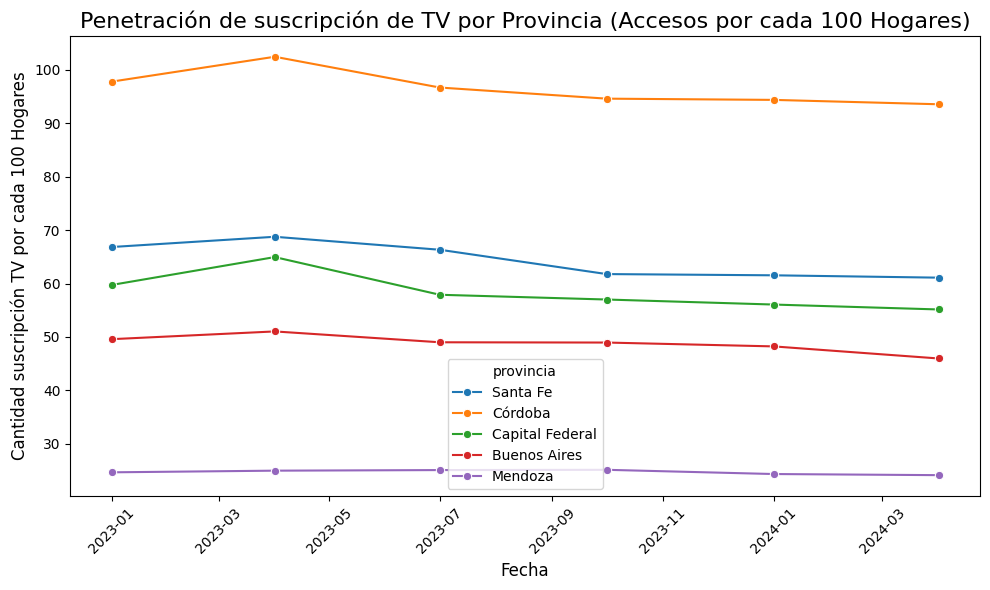

In [48]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
df_accesosuscripciontv['fecha'] = pd.to_datetime(df_accesosuscripciontv['fecha'], errors='coerce')

# Filtrar solo las 5 provincias de interés y los años 2023 y 2024
provincias_interes = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Capital Federal', 'Mendoza']
df_provincias = df_accesosuscripciontv[
    (df_accesosuscripciontv['provincia'].isin(provincias_interes)) &
    (df_accesosuscripciontv['fecha'].dt.year.isin([2023, 2024]))
]

# Ordenar el DataFrame por la columna 'fecha'
df_provincias = df_provincias.sort_values(by=['fecha'])

# Crear el gráfico de líneas, donde cada línea representa una provincia
plt.figure(figsize=(10, 6))

# Graficar usando seaborn
sns.lineplot(data=df_provincias, x='fecha', y='suscripcioncada100hogares', hue='provincia', marker='o')

# Personalizar el gráfico
plt.title('Penetración de suscripción de TV por Provincia (Accesos por cada 100 Hogares)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad suscripción TV por cada 100 Hogares', fontsize=12)
plt.xticks(rotation=45)  # Rotar los valores del eje X para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()




## Conclusión del gráfico
Identificamos una gran demanda potencial en las provincias de Mendoza y Buenos Aires, ya que la penetración del servicio de suscripción de TV es baja, destacando la provincia de Buenos Aires, considerando que su población es mucho mayor. 

# 5. Análisis cuantitativo entre accesos a internet por cada 100 hogares

## Justificación del gráfico
Con este gráfico se busca detectar provincias donde la penetración de internet por suscripción sea baja, lo cual nos presentaria una demanda potencial. Vamos a realizar el análisis en nuestras provincias de interés.

In [50]:
# Cargar los DataFrames desde la base de datos
df_suscripcioninternet = pd.read_sql('SELECT * FROM accesohogaresprovincia', con=engine)

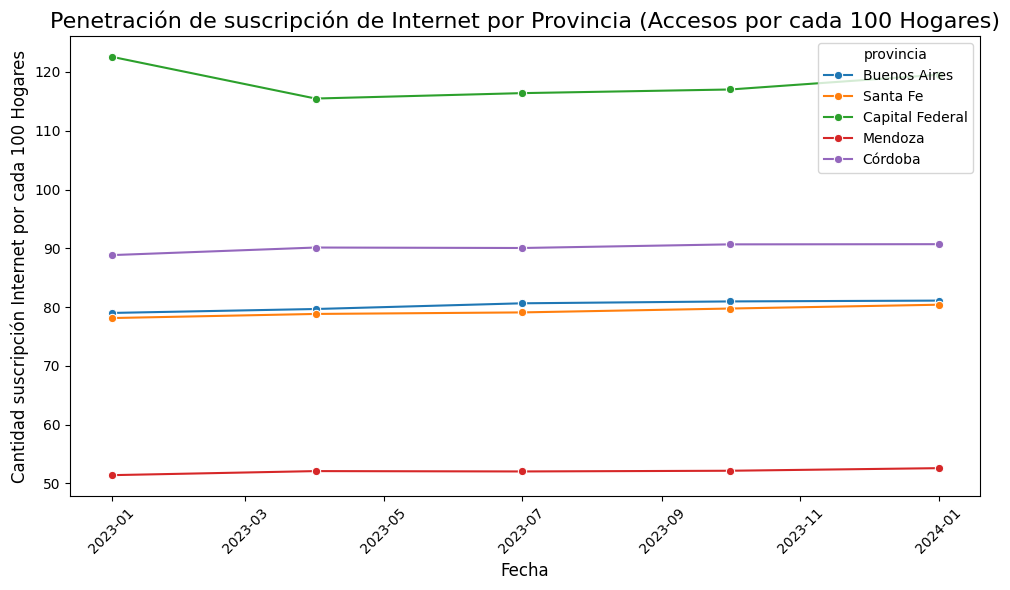

In [53]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
df_suscripcioninternet['fecha'] = pd.to_datetime(df_suscripcioninternet['fecha'], errors='coerce')

# Filtrar solo las 5 provincias de interés y los años 2023 y 2024
provincias_interes = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Capital Federal', 'Mendoza']
df_provincias = df_suscripcioninternet[
    (df_suscripcioninternet['provincia'].isin(provincias_interes)) &
    (df_suscripcioninternet['fecha'].dt.year.isin([2023, 2024]))
]

# Ordenar el DataFrame por la columna 'fecha'
df_provincias = df_provincias.sort_values(by=['fecha'])

# Crear el gráfico de líneas, donde cada línea representa una provincia
plt.figure(figsize=(10, 6))

# Graficar usando seaborn
sns.lineplot(data=df_provincias, x='fecha', y='accesoscada100hogares', hue='provincia', marker='o')

# Personalizar el gráfico
plt.title('Penetración de suscripción de Internet por Provincia (Accesos por cada 100 Hogares)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad suscripción Internet por cada 100 Hogares', fontsize=12)
plt.xticks(rotation=45)  # Rotar los valores del eje X para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Conclusión del gráfico¶
Identificamos una gran demanda potencial en la provincia de Mendoza, resaltando además que esta provincia tiene una gran demanda potencial en la suscripción de TV.

# 6. KPI. Penetración de fibra óptica por provincia, Trimestral.

## Objetivos del análisis
Se busca determinar la meta de cumplimiento para el crecimiento trimestral de acceso a internet mediante fibra óptica, por provincia.
Se eliminan outlier para tener una meta mas real. 

In [122]:
# Cargar los DataFrames desde la base de datos
df_accesofibra = pd.read_sql('SELECT * FROM kpi_penetracion_fibra', con=engine)

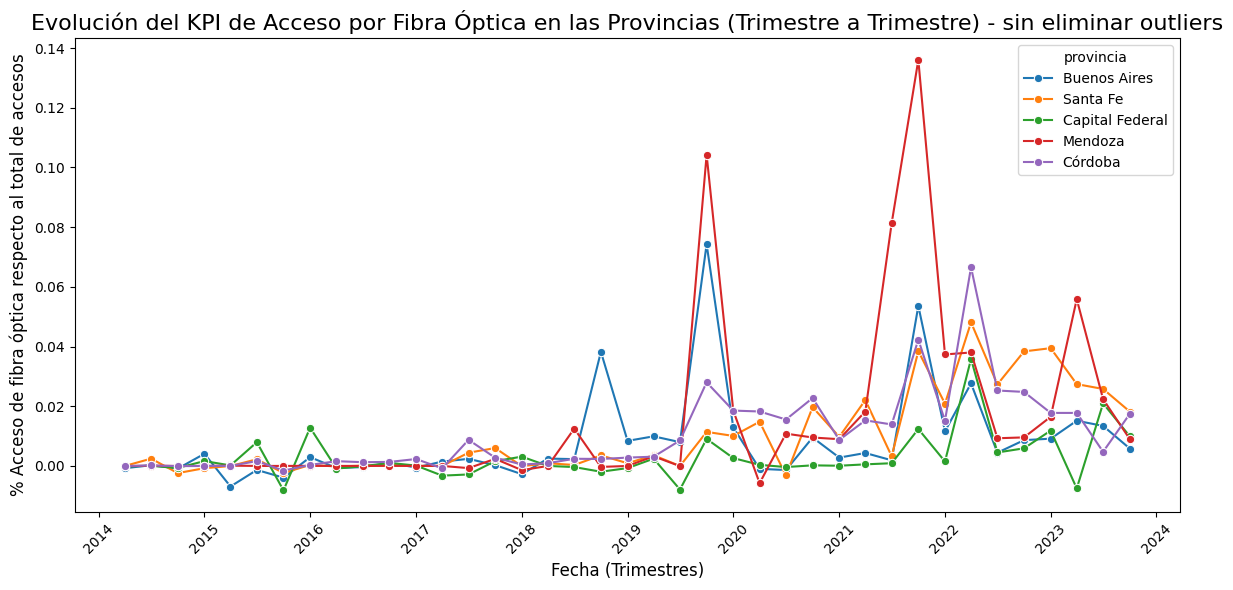

In [123]:
# Provincias de interés
provincias_interes = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Capital Federal', 'Mendoza']

# Filtrar el DataFrame por las provincias de interés
df_fibra_provincias = df_accesofibra[df_accesofibra['provincia'].isin(provincias_interes)]

# Asegurarse de que el campo 'fecha' esté en formato datetime
df_fibra_provincias['fecha'] = pd.to_datetime(df_fibra_provincias['fecha'], errors='coerce')

# Ordenar el DataFrame por fecha para asegurarse de que los trimestres estén ordenados
df_fibra_provincias = df_fibra_provincias.sort_values(by='fecha')

# Crear el gráfico de líneas, donde cada línea representa una provincia
plt.figure(figsize=(12, 6))

# Graficar usando seaborn, con 'hue' para diferenciar por provincia
sns.lineplot(data=df_fibra_provincias, x='fecha', y='kpi_porcentajefibra', hue='provincia', marker='o')

# Personalizar el gráfico
plt.title('Evolución del KPI de Acceso por Fibra Óptica en las Provincias (Trimestre a Trimestre) - sin eliminar outliers', fontsize=16)
plt.xlabel('Fecha (Trimestres)', fontsize=12)
plt.ylabel('% Acceso de fibra óptica respecto al total de accesos', fontsize=12)
plt.xticks(rotation=45)  # Rotar los valores del eje X para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [124]:
# Calcular la media y la desviación estándar del KPI para cada provincia
df_desviacion_kpi = df_fibra_provincias.groupby('provincia')['kpi_porcentajefibra'].agg(['mean', 'std']).reset_index()

# Agregar una columna 'meta' basada en la media más una desviación estándar
df_desviacion_kpi['meta'] = df_desviacion_kpi['mean'] + df_desviacion_kpi['std']

# Ver los resultados
print(df_desviacion_kpi)


         provincia      mean       std      meta
0     Buenos Aires  0.008110  0.015772  0.023882
1  Capital Federal  0.002885  0.007945  0.010830
2          Córdoba  0.010537  0.013818  0.024355
3          Mendoza  0.015268  0.030375  0.045643
4         Santa Fe  0.010026  0.013934  0.023960


In [127]:
# Calcular la media y desviación estándar iniciales por provincia
df_stats = df_fibra_provincias.groupby('provincia')['kpi_porcentajefibra'].agg(['mean', 'std']).reset_index()

# Unir las estadísticas calculadas con el dataframe original para facilitar el filtrado
df_fibra_provincias = pd.merge(df_fibra_provincias, df_stats, on='provincia')

# Definir el rango para eliminar outliers: media ± 1 desviaciones estándar
df_fibra_provincias['lower_bound'] = df_fibra_provincias['mean'] - 1 * df_fibra_provincias['std']
df_fibra_provincias['upper_bound'] = df_fibra_provincias['mean'] + 1 * df_fibra_provincias['std']

# Filtrar los datos quitando los outliers
df_fibra_sin_outliers = df_fibra_provincias[
    (df_fibra_provincias['kpi_porcentajefibra'] >= df_fibra_provincias['lower_bound']) & 
    (df_fibra_provincias['kpi_porcentajefibra'] <= df_fibra_provincias['upper_bound'])
]

# Calcular nuevamente la media y la desviación estándar sin outliers
df_desviacion_kpi_sin_outliers = df_fibra_sin_outliers.groupby('provincia')['kpi_porcentajefibra'].agg(['mean', 'std']).reset_index()

# Agregar una columna 'meta' basada en la nueva media y desviación estándar
#df_desviacion_kpi_sin_outliers['meta'] = df_desviacion_kpi_sin_outliers['mean'] + df_desviacion_kpi_sin_outliers['std']
df_desviacion_kpi_sin_outliers['meta'] = (df_desviacion_kpi_sin_outliers['mean'] + df_desviacion_kpi_sin_outliers['std'])

# Ver los resultados finales sin outliers
print(df_desviacion_kpi_sin_outliers)


         provincia      mean       std      meta
0     Buenos Aires  0.003500  0.005338  0.008838
1  Capital Federal  0.001365  0.003154  0.004519
2          Córdoba  0.006588  0.007491  0.014079
3          Mendoza  0.006227  0.010409  0.016637
4         Santa Fe  0.004567  0.007290  0.011857


In [128]:
df_desviacion_kpi_sin_outliers = df_desviacion_kpi_sin_outliers.drop(columns=['mean', 'std'])

# Renombrar columnas 
df_desviacion_kpi_sin_outliers.rename(columns={    
    'meta':'kpi_meta'    
}, inplace=True)

# Verificar el cambio de nombres de columnas
print(df_desviacion_kpi_sin_outliers.columns)


Index(['provincia', 'kpi_meta'], dtype='object')


In [129]:
df_desviacion_kpi_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   provincia  5 non-null      object 
 1   kpi_meta   5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes


In [130]:
# Detalles de la conexión a la base de datos PostgreSQL
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
ENDPOINT = 'localhost'  # El nombre del host
USER = 'pi2_user'  # Usuario de la base de datos
PASSWORD = '1234'  # Contraseña del usuario
PORT = 5432  # Puerto de PostgreSQL (por defecto es 5432)
DATABASE = 'pi2'  # El nombre de la base de datos

# Crear la URL de conexión a la base de datos
connection_string = f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASE}"

# Crear el motor de conexión
engine = create_engine(connection_string)

# Cargar el DataFrame "df_accesofibra"
df_desviacion_kpi_sin_outliers.to_sql('kpi_meta_penetracion_fibraoptica', con=engine, if_exists='append', index=False)

5

In [ ]:
## Consideraciones del KPI
- Se eliminan outliers para tener una desviación estándar más precisa que nos permita plantear una meta más realista. 
- Se plantea un KPI por provincia, ya que cada provincia maneja una desviación estándar de accesos muy distante, y se debe plantear una meta por cada provincia. 

# KPI. Penetración de TV por suscripción en los hogares por provincia, Trimestral. 

In [99]:
# Cargar los DataFrames desde la base de datos
df_penetracion_suscripcionTV = pd.read_sql('SELECT * FROM kpi_penetracion_suscripciontv', con=engine)

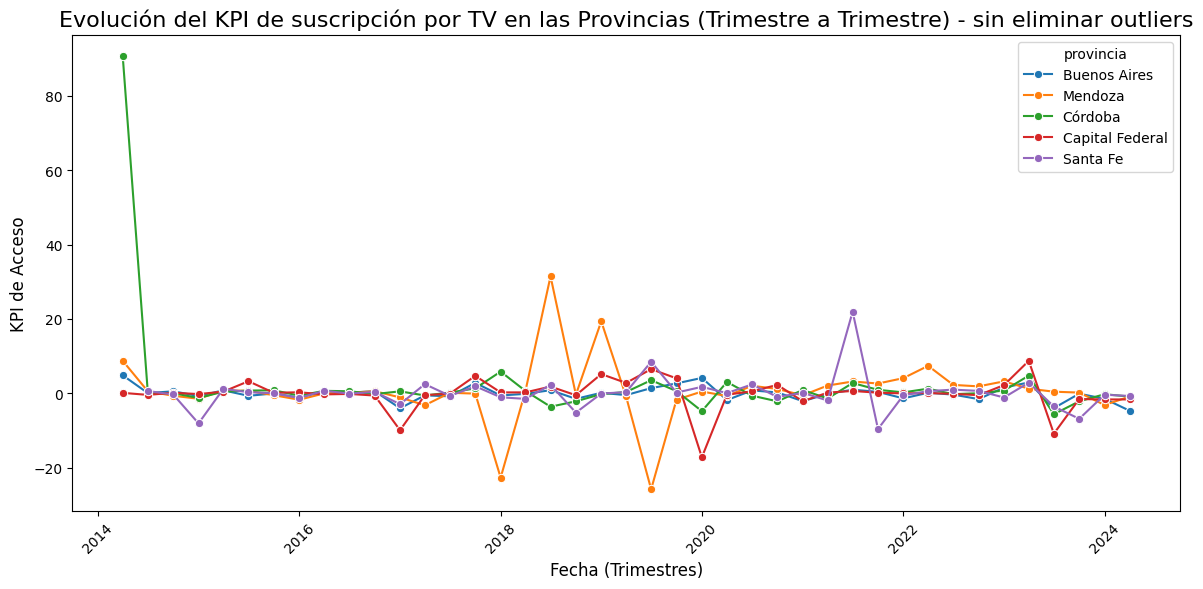

In [100]:
# Provincias de interés
provincias_interes = ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Capital Federal', 'Mendoza']

# Filtrar el DataFrame por las provincias de interés
df_suscripcionTV_provincias = df_penetracion_suscripcionTV[df_penetracion_suscripcionTV['provincia'].isin(provincias_interes)]

# Asegurarse de que el campo 'fecha' esté en formato datetime
df_suscripcionTV_provincias.loc[:, 'fecha'] = pd.to_datetime(df_suscripcionTV_provincias['fecha'], errors='coerce')

# Ordenar el DataFrame por fecha para asegurarse de que los trimestres estén ordenados
df_suscripcionTV_provincias = df_suscripcionTV_provincias.sort_values(by='fecha')

# Crear el gráfico de líneas, donde cada línea representa una provincia
plt.figure(figsize=(12, 6))

# Graficar usando seaborn, con 'hue' para diferenciar por provincia
sns.lineplot(data=df_suscripcionTV_provincias, x='fecha', y='kpi', hue='provincia', marker='o')

# Personalizar el gráfico
plt.title('Evolución del KPI de suscripción por TV en las Provincias (Trimestre a Trimestre) - sin eliminar outliers', fontsize=16)
plt.xlabel('Fecha (Trimestres)', fontsize=12)
plt.ylabel('KPI de Acceso', fontsize=12)
plt.xticks(rotation=45)  # Rotar los valores del eje X para mejor visualización

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [101]:
# Calcular la media y la desviación estándar del KPI para cada provincia
df_desviacion_kpi = df_suscripcionTV_provincias.groupby('provincia')['kpi'].agg(['mean', 'std']).reset_index()

# Agregar una columna 'meta' basada en la media más una desviación estándar
df_desviacion_kpi['meta'] = df_desviacion_kpi['mean'] + df_desviacion_kpi['std']

# Ver los resultados
print(df_desviacion_kpi)

         provincia      mean        std       meta
0     Buenos Aires -0.039129   1.916808   1.877680
1  Capital Federal -0.097371   4.308956   4.211585
2          Córdoba  2.320235  14.296942  16.617177
3          Mendoza  0.731419   8.299370   9.030789
4         Santa Fe  0.088385   4.685379   4.773764


In [102]:
# Calcular la media y desviación estándar iniciales por provincia
df_stats = df_suscripcionTV_provincias.groupby('provincia')['kpi'].agg(['mean', 'std']).reset_index()

# Unir las estadísticas calculadas con el dataframe original para facilitar el filtrado
df_suscripcionTV_provincias = pd.merge(df_suscripcionTV_provincias, df_stats, on='provincia')

# Definir el rango para eliminar outliers: media ± 2 desviaciones estándar
df_suscripcionTV_provincias['lower_bound'] = df_suscripcionTV_provincias['mean'] - 2 * df_suscripcionTV_provincias['std']
df_suscripcionTV_provincias['upper_bound'] = df_suscripcionTV_provincias['mean'] + 2 * df_suscripcionTV_provincias['std']

# Filtrar los datos quitando los outliers
df_fibra_sin_outliers = df_suscripcionTV_provincias[
    (df_suscripcionTV_provincias['kpi'] >= df_suscripcionTV_provincias['lower_bound']) & 
    (df_suscripcionTV_provincias['kpi'] <= df_suscripcionTV_provincias['upper_bound'])
]

# Calcular nuevamente la media y la desviación estándar sin outliers
df_desviacion_kpi_sin_outliers = df_fibra_sin_outliers.groupby('provincia')['kpi'].agg(['mean', 'std']).reset_index()

# Agregar una columna 'meta' basada en la nueva media y desviación estándar
df_desviacion_kpi_sin_outliers['meta'] = (df_desviacion_kpi_sin_outliers['mean'].round().astype(int) + df_desviacion_kpi_sin_outliers['std']).round().astype(int)

# Ver los resultados finales sin outliers
print(df_desviacion_kpi_sin_outliers)

         provincia      mean       std  meta
0     Buenos Aires  0.058209  1.223040     1
1  Capital Federal  0.682520  1.951612     3
2          Córdoba  0.112437  2.161061     2
3          Mendoza  0.746537  2.414726     3
4         Santa Fe -0.232008  2.749374     3


In [103]:
df_desviacion_kpi_sin_outliers = df_desviacion_kpi_sin_outliers.drop(columns=['mean', 'std'])

# Renombrar columnas 
df_desviacion_kpi_sin_outliers.rename(columns={    
    'meta':'kpi_meta'    
}, inplace=True)

# Verificar el cambio de nombres de columnas
print(df_desviacion_kpi_sin_outliers.columns)

Index(['provincia', 'kpi_meta'], dtype='object')


In [104]:
df_desviacion_kpi_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   provincia  5 non-null      object
 1   kpi_meta   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [105]:
# Cargar el DataFrame "df_acceso_suscripciontv"
df_desviacion_kpi_sin_outliers.to_sql('kpi_meta_penetracion_suscripciontv', con=engine, if_exists='append', index=False)

5